| Var&$$(a, \sigma^2)$$| $$\gamma$$ | n | M | K | С.В. Z | С.В. W |
| --- | --- | --- | --- | --- | --- | --- |
| 5 (-1;16) | 0.9 | 16 | 1950 | 180 | $$Z =  \dfrac{(n-1)S^2}{\sigma^2} $$| $$W=\frac{1}{4}\sum_{i=1}^{4}U_i$$ $$Где\ U_i\ -\ случайная\ выборка\newline из\ 4\ значений\ св\ U,\newline имеющей\ распределение\ F-distribution(3)$$|


In [347]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import statistics

In [348]:
# consts
n = 16
a = -1
sigma = int(math.sqrt(16))
gamma = 0.9
M = 1950
K = 180

# n = 18
# a = 4
# sigma = math.sqrt(9)
# gamma = 0.99
# M = 2300
# K = 170


# Часть I





## 1.

In [349]:
# a =1 
# sigma = 2
# n = 500

sample = np.random.normal(loc=a, scale=sigma, size=n)

### 1.1 
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X известна

In [350]:
mean = statistics.mean(sample)
t = stats.norm.ppf((gamma/2)+0.5)
delta = t*sigma/math.sqrt(n)

In [351]:
print(f"Доверительный интервал для матожидания а \nпри известной дисперсии sigma = {sigma} при gamma = {gamma}: \n({mean - delta}, {mean + delta})")
print(f"Доверительный интервал by python: \n{stats.norm.interval(confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))}")

Доверительный интервал для матожидания а 
при известной дисперсии sigma = 4 при gamma = 0.9: 
(-2.2161446514940812, 1.0735626024088631)
Доверительный интервал by python: 
(-2.2161446514940817, 1.0735626024088631)


### 1.2
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X НЕ известна

In [352]:
t = stats.t.ppf(((1+gamma)/2), df=n-1)
my_sigma = statistics.variance(sample)
delta = t*np.sqrt(my_sigma)/np.sqrt(n)
print(
    f"Доверительный интервал для матожидания а \nпри неизвестной дисперсии sigma = {sigma} при gamma = {gamma}: \n({mean - delta}, {mean + delta})")
print(
    f"Доверительный интервал by python: \n{stats.t.interval(gamma, df= n-1, loc=np.mean(sample), scale=np.sqrt(statistics.variance(sample))/np.sqrt(n))}")
# stats.sem - Calculate the standard error of the mean (or standard error of measurement) of the values in the input array.


Доверительный интервал для матожидания а 
при неизвестной дисперсии sigma = 4 при gamma = 0.9: 
(-2.223516089394969, 1.0809340403097507)
Доверительный интервал by python: 
(-2.2235160893949693, 1.0809340403097507)


### 1.3
Найти интервальную оценку (доверительный интервал) для дисперссии


In [353]:
def estimation_of_variance(sample_n, n_points, n_gamma):
    variance = statistics.variance(sample_n)
    chi2_upper = stats.chi2.ppf((1 - n_gamma)/2, n_points-1)
    chi2_lower = stats.chi2.ppf((1 + n_gamma)/2, n_points-1)
    intervals = ((n_points-1) * variance / chi2_lower), ((n_points-1) * variance / chi2_upper)
    return intervals


print(
    f"Доверительный интервал для дисперсии sigma при gamma = {gamma}: {estimation_of_variance(sample, n, gamma)})")

Доверительный интервал для дисперсии sigma при gamma = 0.9: (8.528919239669792, 29.36079352177143))


## 2
Зависимость длины доверительного интервала от надежности при неизменном объеме выборки

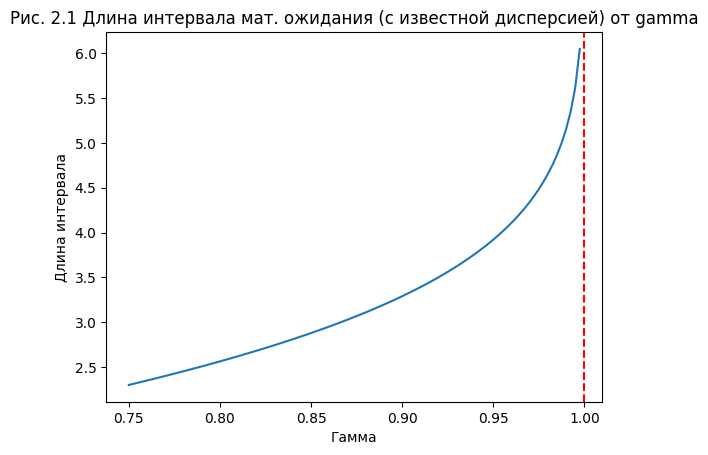

In [354]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma_tmp = gamma_0+i*h
    tmp = stats.norm.interval(
        confidence=gamma_tmp, loc=sample.mean(), scale=sigma/math.sqrt(n))
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma_tmp)

plt.plot(arr_gamma, bounds)
plt.title(f'Рис. 2.1 Длина интервала мат. ожидания (с известной дисперсией) от gamma')
plt.xlabel('Гамма')
plt.ylabel('Длина интервала')
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

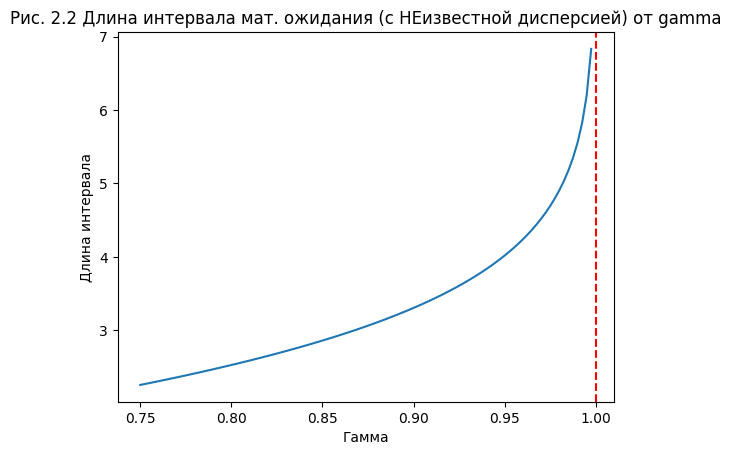

In [355]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma_tmp = gamma_0+i*h
    tmp = stats.t.interval(gamma_tmp, df=n-1, loc=np.mean(sample),
                           scale=np.sqrt(statistics.variance(sample))/np.sqrt(n))
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma_tmp)

plt.plot(arr_gamma, bounds)
plt.title(f'Рис. 2.2 Длина интервала мат. ожидания (с НЕизвестной дисперсией) от gamma')
plt.xlabel('Гамма')
plt.ylabel('Длина интервала')
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

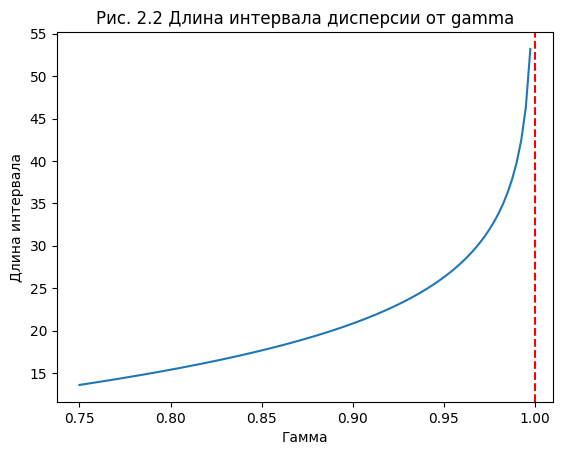

In [356]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma_tmp = gamma_0+i*h
    tmp = estimation_of_variance(sample, n, gamma_tmp)
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma_tmp)

plt.plot(arr_gamma, bounds)
plt.title(f'Рис. 2.2 Длина интервала дисперсии от gamma')
plt.xlabel('Гамма')
plt.ylabel('Длина интервала')
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

## 3
Построить зависимость длины доверительного интервала от объема выборки при неизменной надежности

Text(0.5, 1.0, 'Рис. 3.1 Длина интервала мат. ожидания c известной дисперсией')

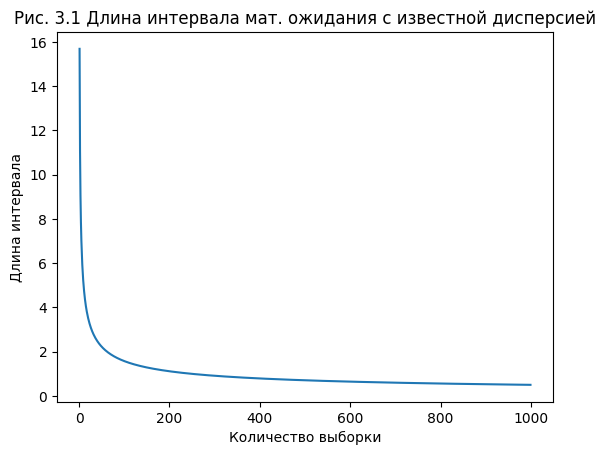

In [357]:
gamma_2 = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(1, 1000):
    sample_tmp = np.random.normal(loc=a, scale=sigma, size=i)
    tmp = stats.norm.interval(
        confidence=gamma_2, loc=np.mean(sample_tmp), scale=sigma/math.sqrt(i))
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)


plt.plot(arr_len, bounds)
plt.xlabel('Количество выборки')
plt.ylabel('Длина интервала')
plt.title(f'Рис. 3.1 Длина интервала мат. ожидания c известной дисперсией')

Text(0.5, 1.0, 'Рис. 3.2 Длина интервала мат. ожидания c неизвестной дисперсией')

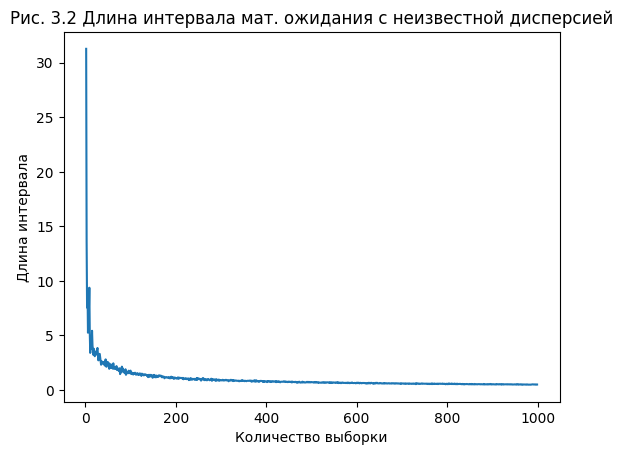

In [358]:
gamma_2 = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(2, 1000):
    sample_tmp = np.random.normal(loc=a, scale=sigma, size=i)
    
    tmp = stats.t.interval(gamma_2, df=i-1, loc=np.mean(sample_tmp),
                           scale=np.sqrt(statistics.variance(sample_tmp))/np.sqrt(i))
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)


plt.plot(arr_len, bounds)
plt.xlabel('Количество выборки')
plt.ylabel('Длина интервала')
plt.title(f'Рис. 3.2 Длина интервала мат. ожидания c неизвестной дисперсией')

Text(0.5, 1.0, 'Зависимость ширины интервала от длины выборки (дисперсия)')

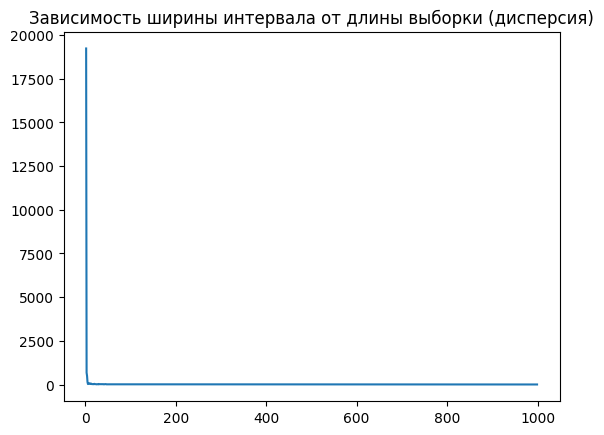

In [359]:
gamma_2 = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(2, 1000):
    sample_tmp = np.random.normal(loc=a, scale=sigma, size=i)
    tmp = estimation_of_variance(sample_tmp, i, gamma_2)

    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)

plt.plot(arr_len, bounds)
plt.title("Зависимость ширины интервала от длины выборки (дисперсия)")

In [360]:
stats.t.interval(confidence=0.95, df=len(sample)-1,
                 loc=np.mean(sample), scale=stats.sem(sample))

(-2.580151952128479, 1.4375699030432607)

## 4
Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a, sigma^2)

In [361]:
count = 0
samples = np.random.normal(a, sigma, (M, n))
for sample_i in samples:
    tmp = stats.t.interval(gamma, df=n-1, loc=np.mean(sample_i),
                           scale=np.sqrt(statistics.variance(sample_i))/np.sqrt(n))
    if tmp[0] <= a <= tmp[1]:
        count+=1
estimation_gamma = count/M



# for i in range(M):
#     sample_tmp = np.random.normal(loc=a, scale=sigma, size=n)
#     tmp = stats.t.interval(gamma, df=n-1, loc=np.mean(sample_tmp),
#                            scale=np.sqrt(statistics.variance(sample_tmp))/np.sqrt(n))
#     bounds.append(tmp)
#     l.append(tmp[0])
#     r.append(tmp[1])
# x_l = pd.Series(data=l)
# x_r = pd.Series(data=r)

# count = ((x_l < a) & (x_r > a)).sum()
# print(f"Оценка гамма = {count/M}")
print(f"Оценка гамма: {estimation_gamma}")
print(f"Гамма: {gamma}")

Оценка гамма: 0.9030769230769231
Гамма: 0.9


## 5 
Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (a, sigma^2)
### 5.1
По каждой из M выборок найти наблюдаемое значение случайной величины Z
(описание случайной величины Z приведено в Вашем варианте)



In [362]:
sample_z = []
for i in range(M):
    sample_i = np.random.normal(loc=a, scale=sigma, size=n)
    s2_i = statistics.variance(sample_i)
    sample_z.append((n-1)*s2_i/sigma**2)

### 5.2
Каков закон распределения случайной величины Z? 

В силу теоремы фишера - хи квадрат (n-1)

### 5.3
По выборке из M значений случайной величины Z найти выборочные числовые
характеристики ее распределения.


In [363]:
my_mean_z = statistics.mean(sample_z)
my_variacne_z = statistics.variance(sample_z) #Несмещенная дисперсия
my_pvariance_z = statistics.pvariance(sample_z) #Смещенная дисперсия
my_dev_z = math.sqrt(my_variacne_z)
my_skewness_z = stats.skew(sample_z)
my_kurtosis_z = stats.kurtosis(sample_z)
print(f'mean - {my_mean_z}, \nvariacne - {my_variacne_z}, \ndev - {my_dev_z}, \nSkewness - {my_skewness_z}, \nKurtosis - {my_kurtosis_z}')
print (f'Pvariance - {my_pvariance_z}')

mean - 15.028200146222122, 
variacne - 29.960411223972454, 
dev - 5.473610437725036, 
Skewness - 0.5442868861804868, 
Kurtosis - 0.07402048247359794
Pvariance - 29.945046910524262


### 5.4 
Построить гистограмму относительных частот и теоретическую кривую
распределения случайной величины Z, а также ящичковую диаграмму

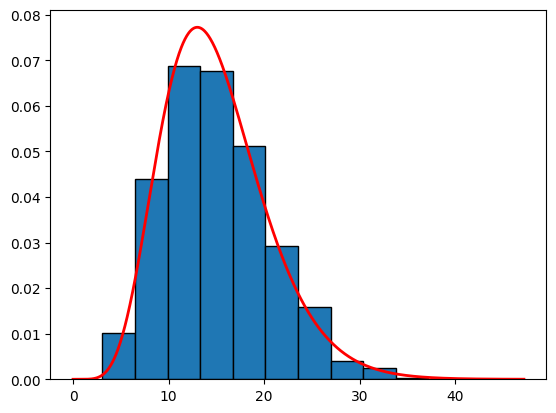

In [364]:
plt.hist(sample_z, edgecolor="black", density=True)
x = np.linspace(0, max(sample_z)+10, 1000)
y = stats.chi2.pdf(x, df=n-1)
plt.plot(x, y, color="r", lw=2)

x = np.linspace(0, max(sample_z) + 10, 1000)
pdf = stats.chi2.pdf(x, n-1)



plt.show()

,0
0.25,10.979254
0.50,14.471079
0.75,18.525692


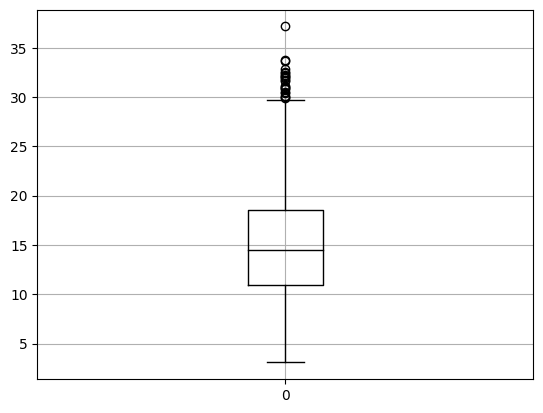

In [365]:
data = pd.DataFrame(sample_z)
data.boxplot(color = "black")
data.quantile([0.25, 0.5, 0.75])


Text(0, 0.5, 'Значение функции распределения')

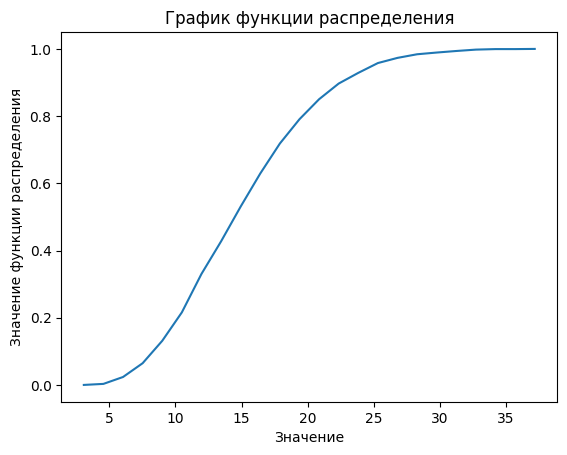

In [366]:
hist_z, edges_z = np.histogram(sample_z, bins="scott")
density_z = hist_z/len(sample_z)
y_z = [sum(density_z[0:i]) for i in range(len(density_z)+1)]
plt.plot(edges_z, y_z)
plt.title("График функции распределения")
plt.xlabel("Значение")
plt.ylabel("Значение функции распределения")

# II часть

## 1
Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (a,sigma^2). По каждой из M выборок с надежностью gamma найти
интервальную оценку (доверительный интервал) для дисперсии случайной величины X

In [367]:
samples = np.random.normal(a, sigma, (M, n))
counter = 0

for sample_i in samples:
        intervals = estimation_of_variance(sample_i, n, gamma)
        if intervals[0] <= sigma**2 <= intervals[1]:
            counter += 1

gamma_estimation = counter / M

print(f"Точечная оценка надежности gamma*: {gamma_estimation}")
print(f'Гамма: {gamma}')

Точечная оценка надежности gamma*: 0.8964102564102564
Гамма: 0.9


## 2
Повторив пункт 1. K раз, получите массив из K значений оценки gamma*. Найдите
выборочные числовые характеристики оценки gamma*, постройте гистограмму относительных
частот и бокс-плот. Каким может быть закон распределения оценки gamma* ? Чему равны
математическое ожидание и дисперсия оценки gamma* ?


In [368]:
sample_gamma_star = []
for i in range(K):
    samples = np.random.normal(a, sigma, (M, n))
    counter = 0
    for sample_i in samples:
            intervals = estimation_of_variance(sample_i, n, gamma)
            if intervals[0] <= sigma**2 <= intervals[1]:
                counter += 1
    gamma_estimation = counter / M
    sample_gamma_star.append(gamma_estimation)


(array([ 6.77083333,  4.0625    , 12.1875    , 36.5625    , 48.75      ,
        47.39583333, 55.52083333, 21.66666667, 10.83333333]),
 array([0.88      , 0.88410256, 0.88820513, 0.89230769, 0.89641026,
        0.90051282, 0.90461538, 0.90871795, 0.91282051, 0.91692308]),
 <BarContainer object of 9 artists>)

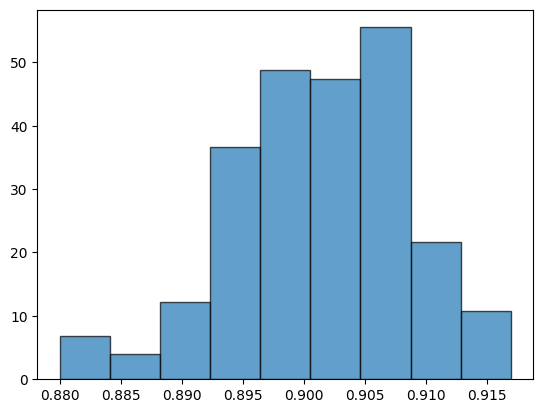

In [369]:
plt.hist(sample_gamma_star, bins='scott', edgecolor='k', alpha=0.7, density=True)

In [370]:
mean_sample_gamma_star= statistics.mean(sample_gamma_star)
variance_sample_gamma_star= statistics.variance(sample_gamma_star)

print(f"мат ожидание: {mean_sample_gamma_star}")
print(f"дисперсия: {variance_sample_gamma_star}")

мат ожидание: 0.90097150997151
дисперсия: 5.034176199052295e-05


Text(0, 0.5, 'Значение функции распределения')

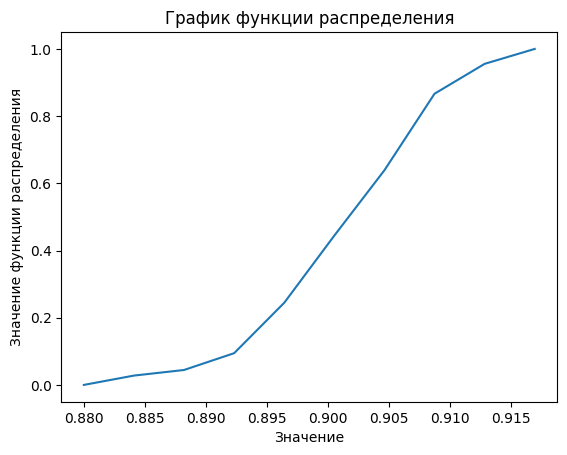

In [371]:
hist_gamma_star, edges_gamma_star = np.histogram(sample_gamma_star, bins="scott")
density_gamma_star = hist_gamma_star/len(sample_gamma_star)
y_z = [sum(density_gamma_star[0:i]) for i in range(len(density_gamma_star)+1)]
plt.plot(edges_gamma_star, y_z)
plt.title("График функции распределения")
plt.xlabel("Значение")
plt.ylabel("Значение функции распределения")

,0
0.25,0.896410
0.50,0.901538
0.75,0.906154


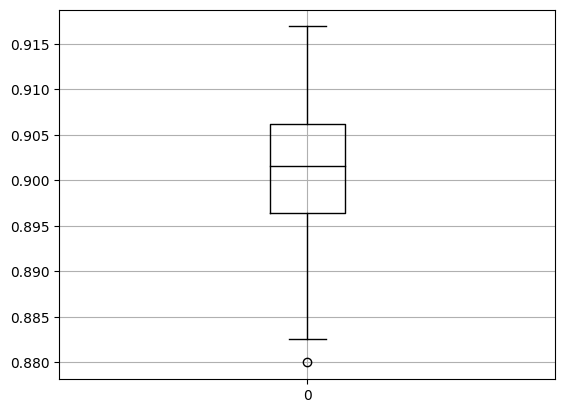

In [372]:
data = pd.DataFrame(sample_gamma_star)
data.boxplot(color = "black")
data.quantile([0.25, 0.5, 0.75])

## 3
Смоделировать M выборок из n значений случайной величины W, закон распределения
которой указан в Вашем варианте. По каждой из M выборок с надежностью gamma найти
интервальную оценку (доверительный интервал) для дисперсии случайной величины W.
По результатам моделирования найти точечную оценку gamma* надежности gamma.

In [402]:
k1 = 7
k2 = 7
n = 16
n1 = 1000
counter = 0
variance_w = (2 * k2**2 * (k1 + k2 - 2)) / (k1 * (k2 - 2)**2 * (k2 - 4)) / n1
vars = []
gamma = 0.9
for i in range(M):
    W = []
    for i in range(n):
        sample_u = np.random.f(dfnum=k1, dfden=k2, size=n1)
        W.append(np.sum(sample_u, axis=0)/n1)       
    s_2_w = statistics.variance(W)
    vars.append(s_2_w)
    intervals_gamma = estimation_of_variance(W, n, gamma)
    if intervals_gamma[0] <= variance_w <= intervals_gamma[1]:
        counter+=1
gamma_estimation_1 = counter/M
print(f"Точечная оценка надежности gamma*: {gamma_estimation_1}")
print(f'Гамма: {gamma}')
print(statistics.mean(vars), variance_w)

Точечная оценка надежности gamma*: 0.8871794871794871
Гамма: 0.9
0.002283386591538713 0.0022400000000000002
